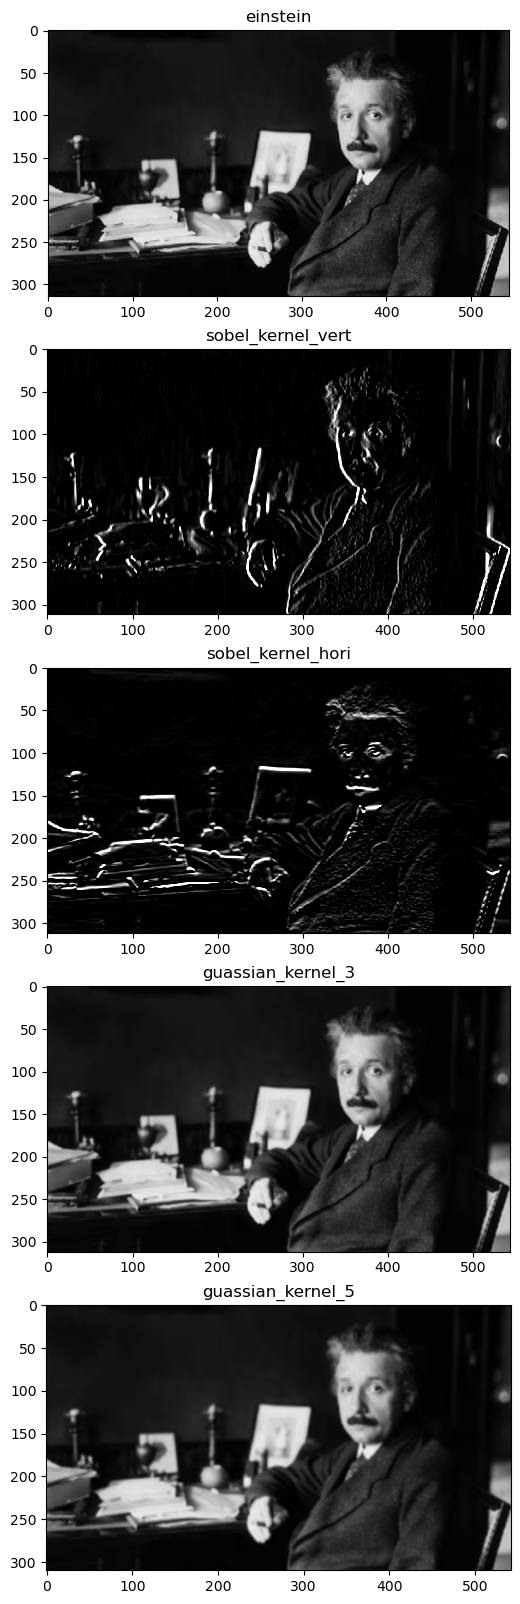

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('img/einstein.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#def different kernel
sobel_kernel_vert = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]])

sobel_kernel_hori = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]])

guassian_kernel_3 = 1 / 16 * np.array([[1, 2, 1],
                                       [2, 4, 2],
                                       [1, 2, 1]])

guassian_kernel_5 = 1 / 256 * np.array([[1, 4, 6, 4, 1],
                                        [4, 16, 24, 16, 4],
                                        [6, 24, 36, 24, 6],
                                        [4, 16, 24, 16, 4],
                                        [1, 4, 6, 4, 1]])


def generate_outImg(srcImg, kernel):
    m = srcImg.shape[0]
    n = srcImg.shape[1]
    outImg = np.zeros([m - kernel.shape[0] + 1, n - kernel.shape[1] + 1])
    return outImg


def conv_2d(src, kernel):
    out = generate_outImg(src, kernel)
    conv(src, out, kernel)
    return out


def conv(src, out, kernel):
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            src_pitch = src[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            pixel_count = kernel.size
            pixel_sum = 0
            srcflat = src_pitch.flatten()
            kernelflat = kernel.flatten()
            for k in range(pixel_count):
                pixel_sum += srcflat[k] * kernelflat[k]

            out[i, j] = pixel_sum


#====================================================
plt.figure(figsize=(20, 20))
plt.subplot(511)
plt.title('einstein')
plt.imshow(gray, cmap="gray", vmin=0, vmax=255)

sobel_vImg = conv_2d(gray, sobel_kernel_vert)
plt.subplot(512)
plt.title('sobel_kernel_vert')
plt.imshow(sobel_vImg, cmap="gray", vmin=0, vmax=255)

sobel_hImg = conv_2d(gray, sobel_kernel_hori)
plt.subplot(513)
plt.title('sobel_kernel_hori')
plt.imshow(sobel_hImg, cmap="gray", vmin=0, vmax=255)

guass3Img = conv_2d(gray, guassian_kernel_3)
plt.subplot(514)
plt.title('guassian_kernel_3')
plt.imshow(guass3Img, cmap="gray", vmin=0, vmax=255)

guass5Img = conv_2d(gray, guassian_kernel_5)
plt.subplot(515)
plt.title('guassian_kernel_5')
plt.imshow(guass5Img, cmap="gray", vmin=0, vmax=255)
plt.show()

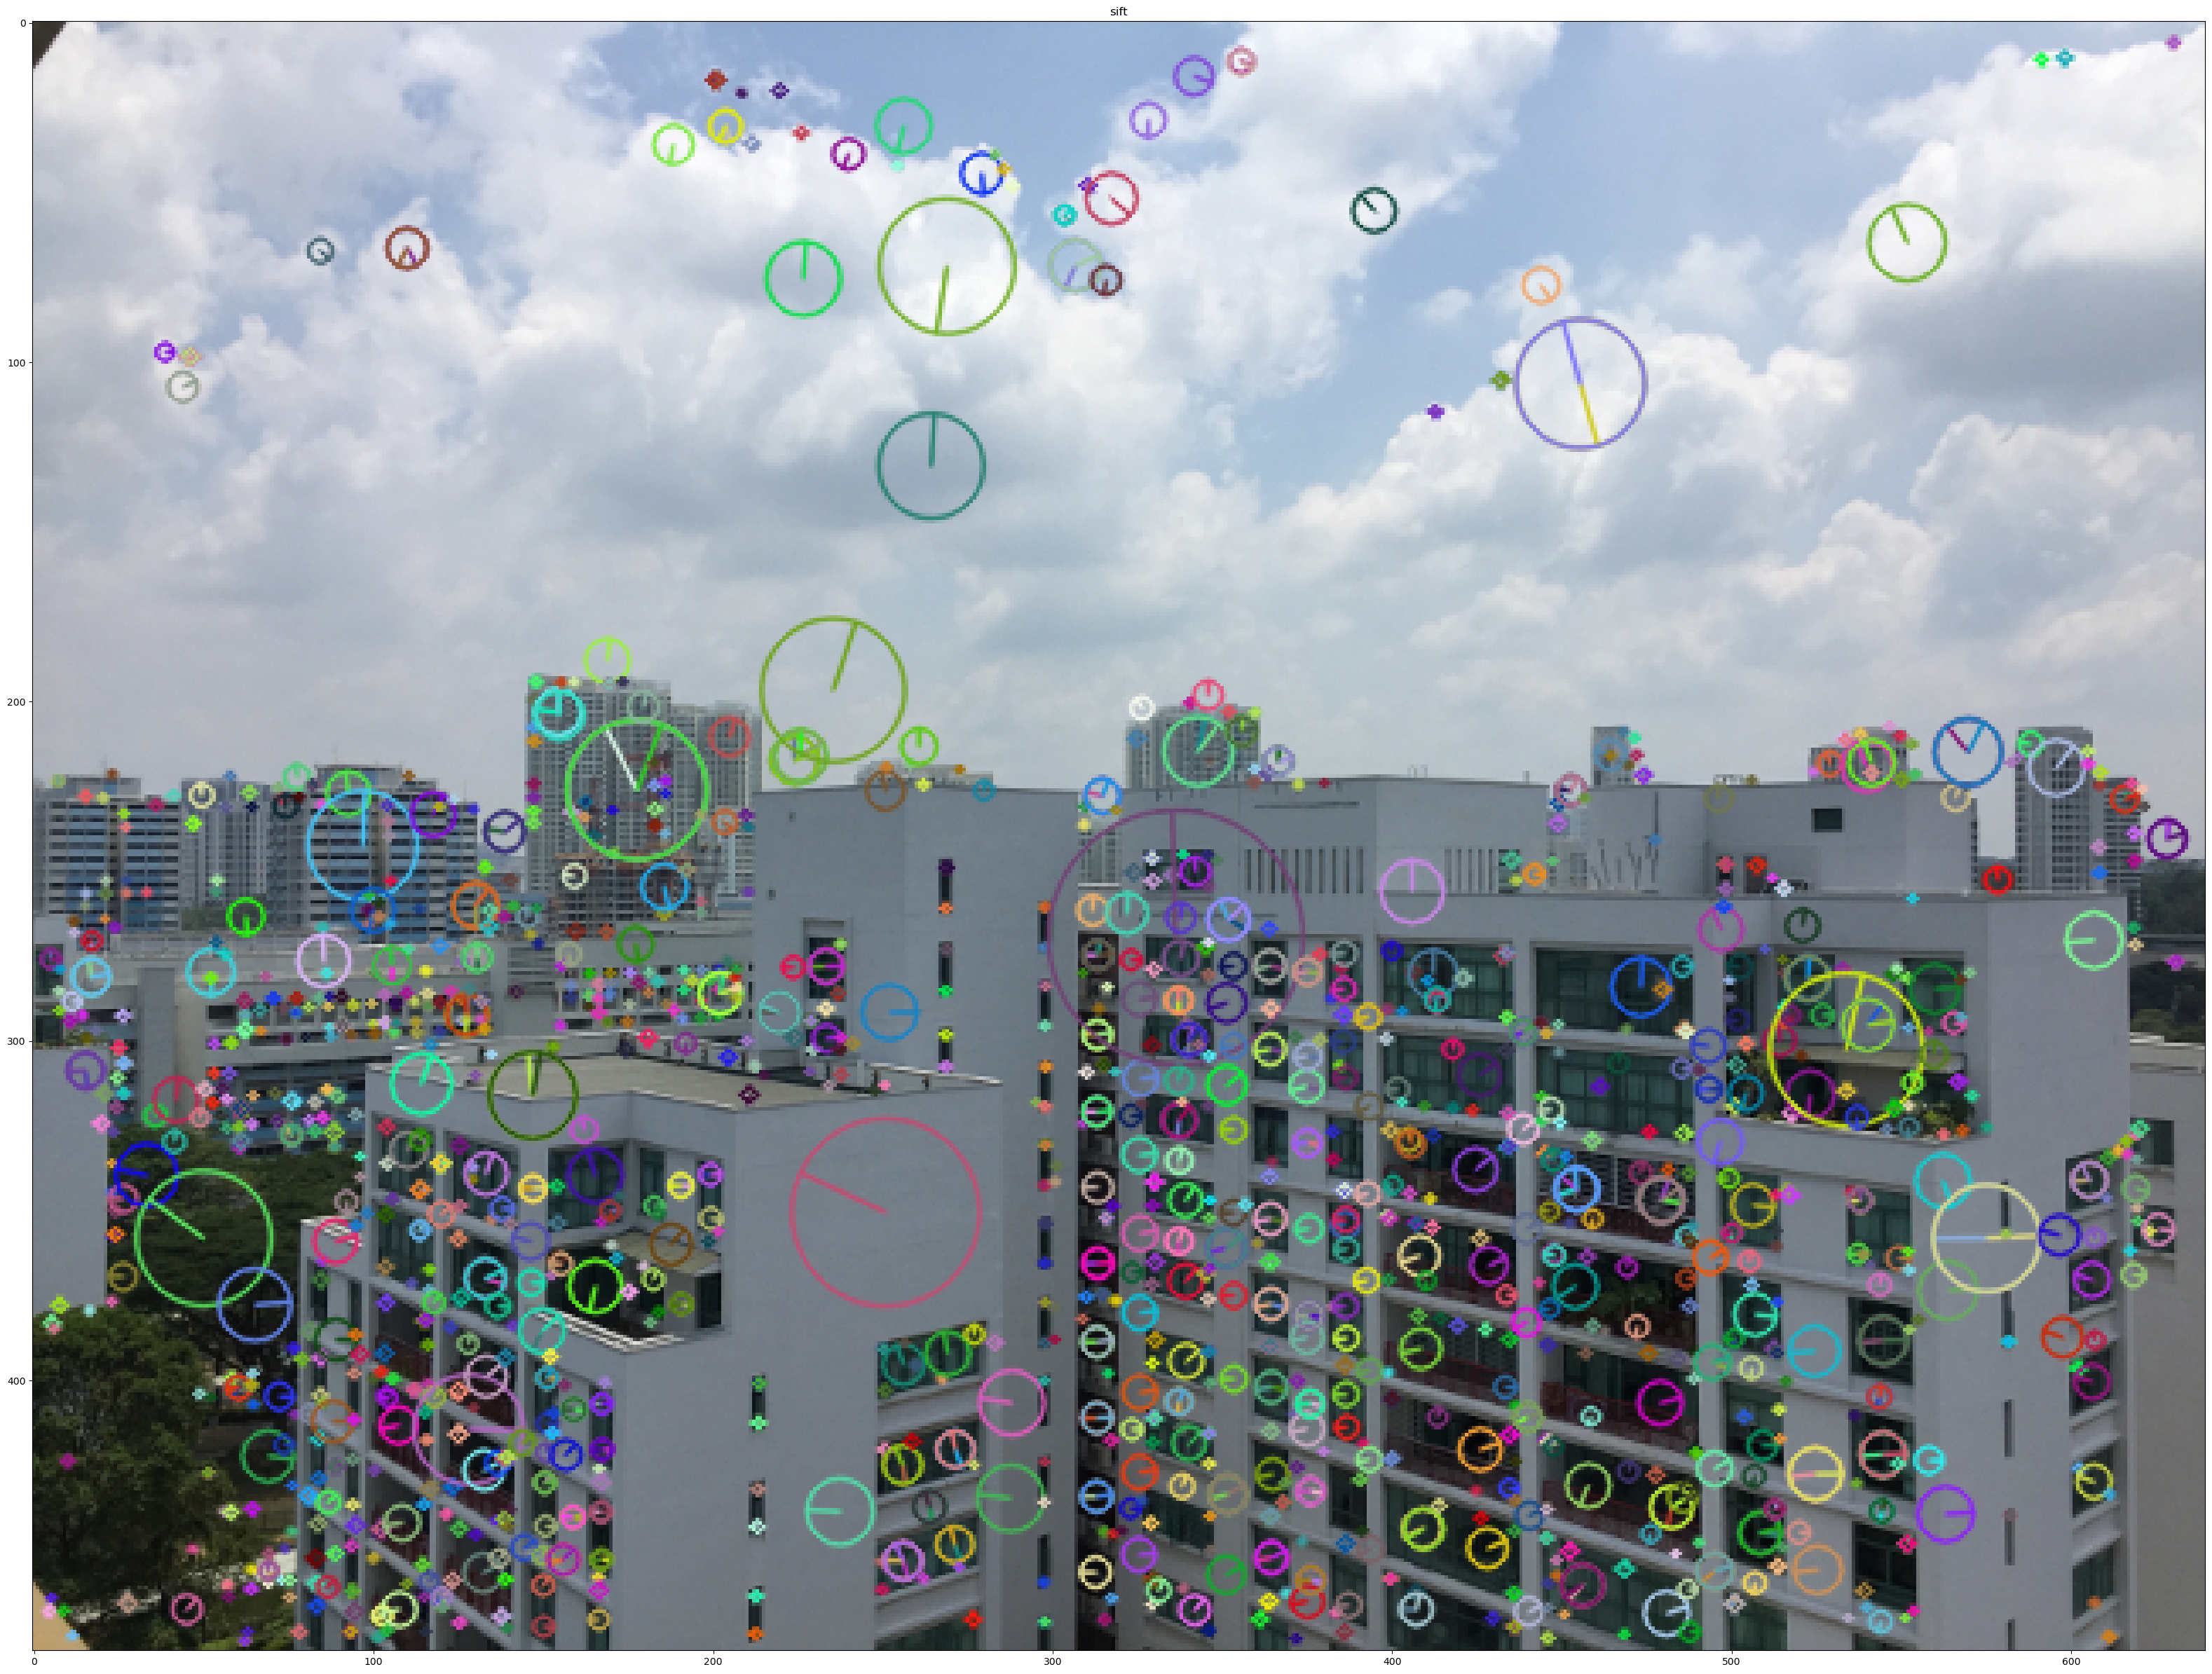

In [2]:
img1 = cv.imread('img/im01.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create()
kp = sift.detect(img1, None)

img1 = cv.drawKeypoints(img1, kp, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# must appoint figsize, or the image will be gray, that confused me
plt.figure(figsize=(40, 40))
plt.title('sift')
plt.imshow(img1)
plt.show()